In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

Python version: 3.8.5


# Kmeans

In [2]:
from pyfit.kmeans import KMeans

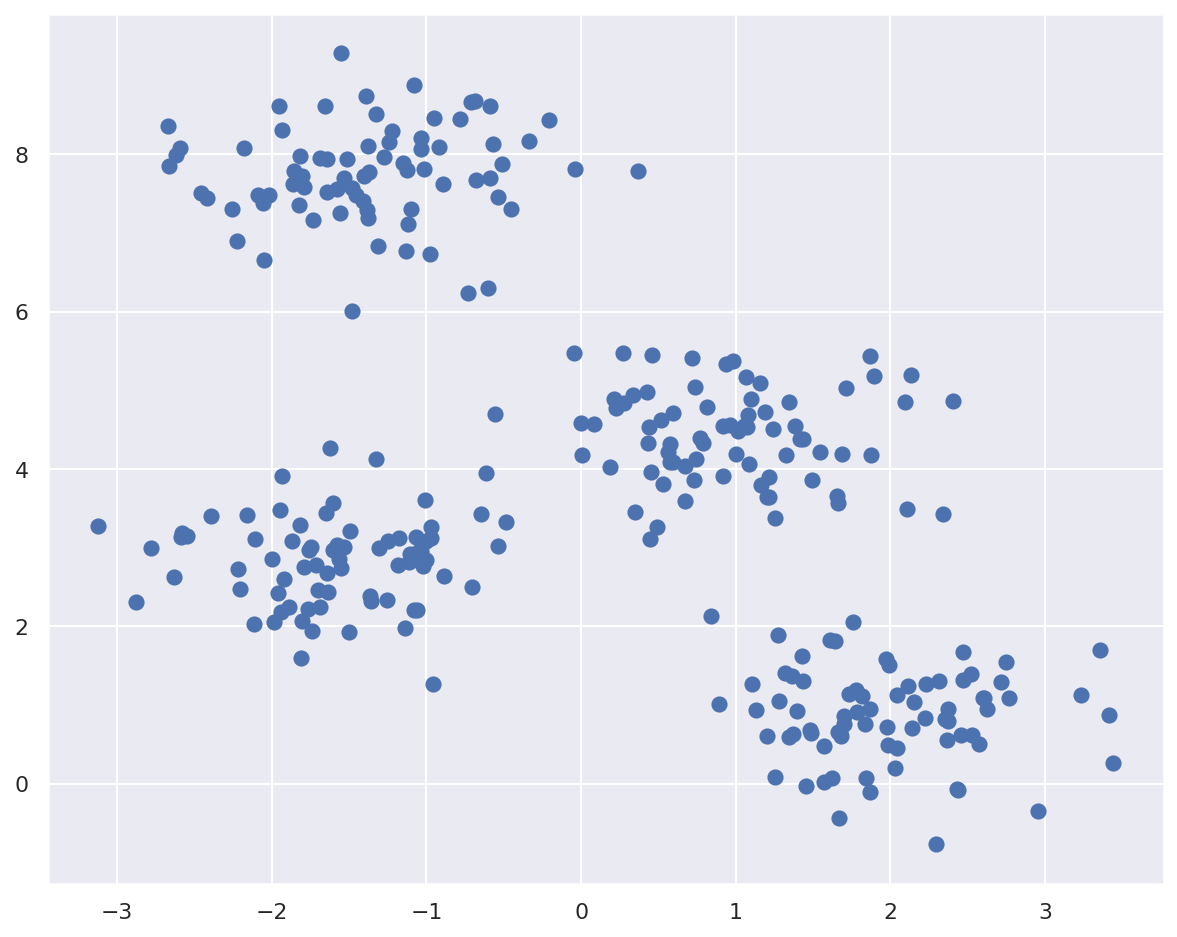

In [3]:
# dataset generation
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

nb iterations : 100


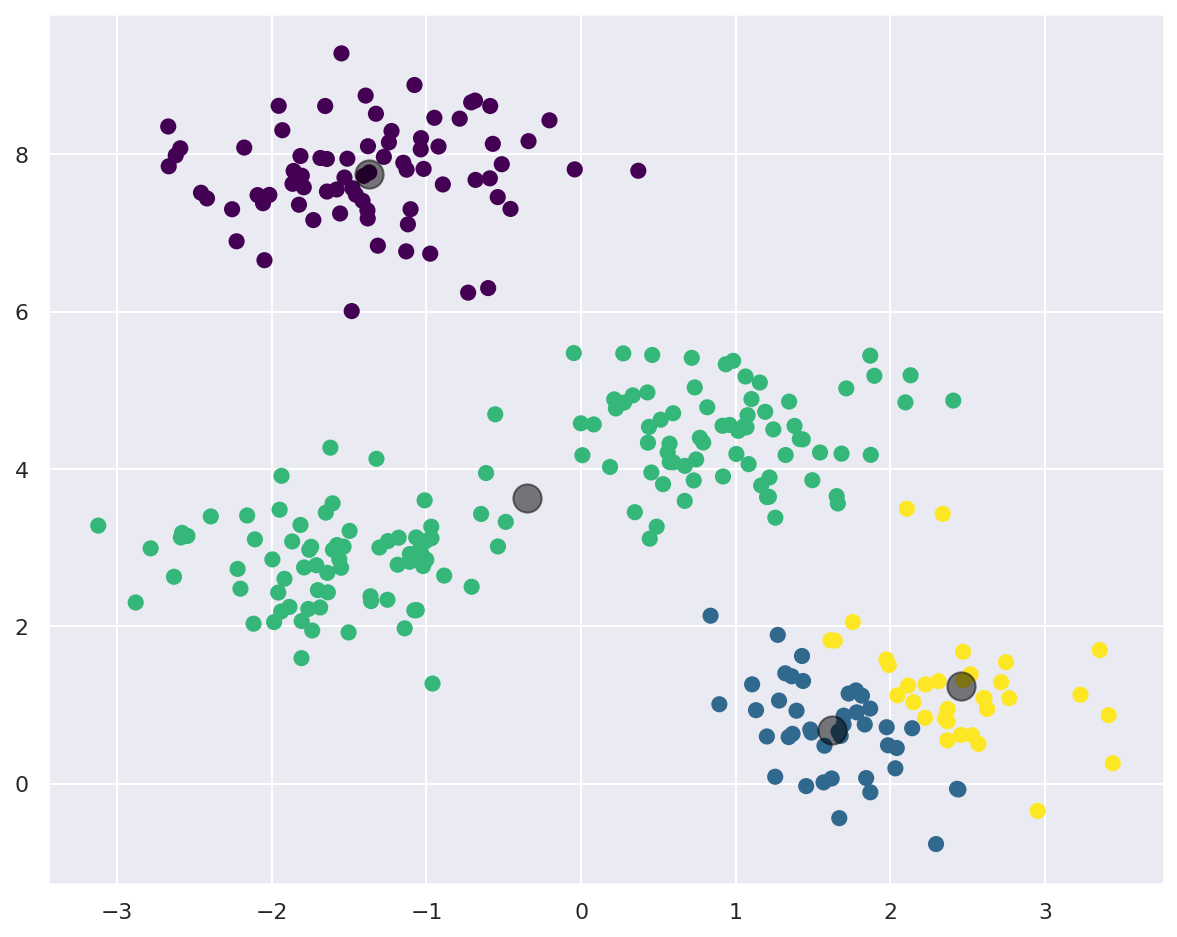

In [4]:
# Apply kmeans
kmeans = KMeans(n_clusters = 4).fit(X)
centers, labels = kmeans.centers_, kmeans.labels_

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Decision Tree Classifier

In [1]:
from pyfit.decision_tree_classifier import DecisionTreeClassifier
from pyfit.metrics import accuracy_score
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()

# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
# Show 10 random samples
df_iris.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
12,4.8,3.0,1.4,0.1,0,setosa
73,6.1,2.8,4.7,1.2,1,versicolor
115,6.4,3.2,5.3,2.3,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
55,5.7,2.8,4.5,1.3,1,versicolor


In [3]:
x_train = iris.data
y_train = iris.target

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_train: (150, 4)
y_train: (150,)


In [4]:
# Train a DT on thedataset
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt_model.fit(x_train, y_train)

0.3
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]
2.4
[0.4 0.4 0.4 0.4 0.5 0.4 0.4 0.6 0.4 1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.  1.3
 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4
 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3 1.2 1.4 1.2 1.  1.3
 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8 1.8 2.5 2.  1.9 2.1
 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8 1.8 1.8 2.1 1.6 1.9
 2.  2.2 1.5 1.4 

/home/shurean/Documents/cours/semestre_9/projet_semestriel/pyfit-ultime/pyfit/decision_tree_classifier.py:43: RuntimeWarning: invalid value encountered in true_divide
  above_gini /= (above_total ** 2)


Exception: node without data, x is empty

In [ ]:
# Compute accuracy on training set
y_pred = [dt_model.predict(x) for x in x_train]
print(y_train)
print(y_pred)
acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {acc:.5f}")